<a href="https://colab.research.google.com/github/Sunny2804/Mashine-learning-simple-projects/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [48]:
house_price_dataset=pd.read_csv('/content/drive/MyDrive/Datasets/BostonHousing.csv')

In [49]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [50]:
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [51]:
house_price_dataset.shape

(506, 14)

In [52]:
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation b/w various feature of dataset

In [53]:
correlation=house_price_dataset.corr()

<Axes: >

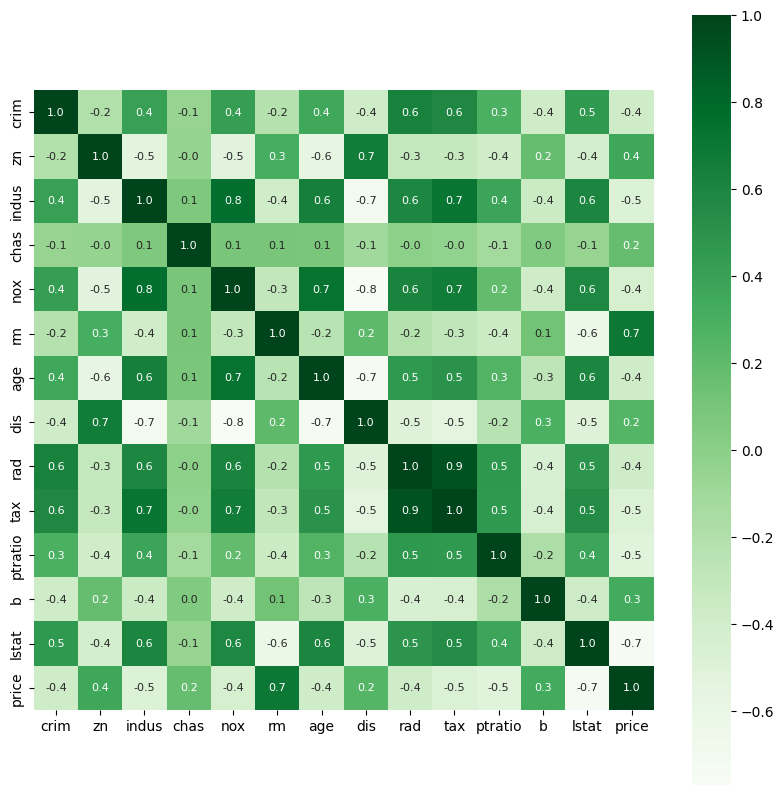

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

splitting the data in feature and target

In [55]:
X=house_price_dataset.drop(columns='price',axis=1)
Y=house_price_dataset['price']

splitting the data in training and testing data

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [57]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


MODEL TRAINING

XGBoost Regressor

In [58]:
model=XGBRegressor()

In [64]:
#training model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
#accuracy on training data
X_train_predict=model.predict(X_train)
#"HERE WE WILL USE R SQUARED ERROR METHOD TO CHECK ACCURACY SCORE"
score_1=metrics.r2_score(Y_train,X_train_predict)
print('R squared error = ',score_1)
 # mean absolute error
score_2=metrics.mean_absolute_error(Y_train,X_train_predict)
print('Mean absolute error = ',score_2)

R squared error =  0.9999980039471451
Mean absolute error =  0.0091330346494618


Visualizing actual and predicted data

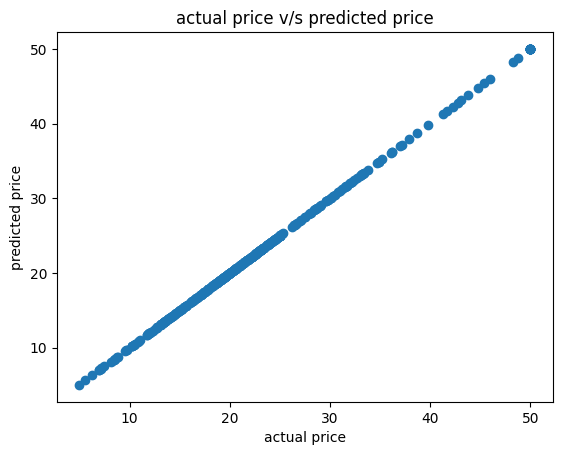

In [66]:
plt.scatter(Y_train,X_train_predict)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price v/s predicted price")
plt.show()

In [62]:
#accuracy on test data
X_test_predict=model.predict(X_test)
#"HERE WE WILL USE R SQUARED ERROR METHOD TO CHECK ACCURACY SCORE"
score_1=metrics.r2_score(X_test_predict,Y_test)
print('R squared error = ',score_1)
 # mean absolute error
score_2=metrics.mean_absolute_error(Y_test,X_test_predict)
print('Mean absolute error = ',score_2)

R squared error =  0.8981202947242624
Mean absolute error =  2.0748727686264927


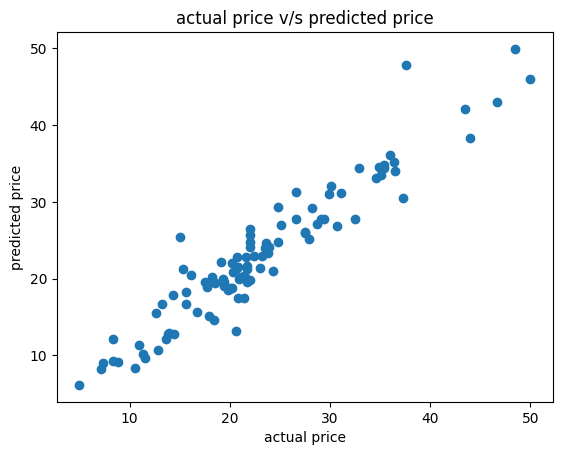

In [67]:
plt.scatter(Y_test,X_test_predict)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price v/s predicted price")
plt.show()